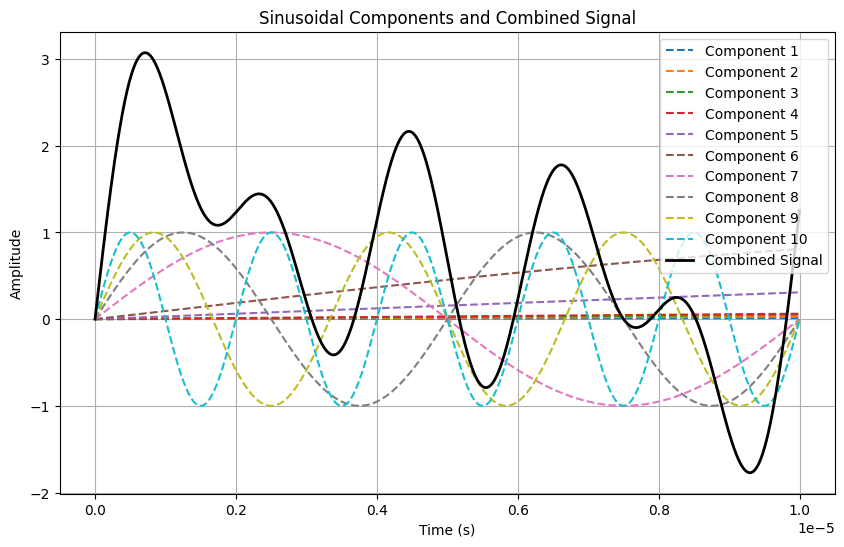

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_signal(frequencies, duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.zeros_like(t)
    components = []

    for frequency in frequencies:
        component = np.sin(2 * np.pi * frequency * t)
        signal += component
        components.append(component)

    return t, signal, components

# Parameters
num_components = 10       # number of sinusoidal components
duration = 0.00001            # duration of the signal in seconds
sampling_rate = 350e6     # sampling rate in Hz (nyquist samplin apply)

# Generate an array of random frequencies within the specified range
frequencies = [200, 500, 800, 1e3, 5e3, 15e3,100e3,200e3, 300e3, 500e3]

# Generate complex signal
t, signal, components = generate_complex_signal(frequencies, duration, sampling_rate)

# Plot all sinusoidal components and the combined signal
plt.figure(figsize=(10, 6))

# Plot all sinusoidal components
for i, component in enumerate(components):
    plt.plot(t, component, label=f'Component {i+1}', linestyle='--')

# Plot the final combined signal
plt.plot(t, signal, color='black', linewidth=2, label='Combined Signal')

plt.title('Sinusoidal Components and Combined Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

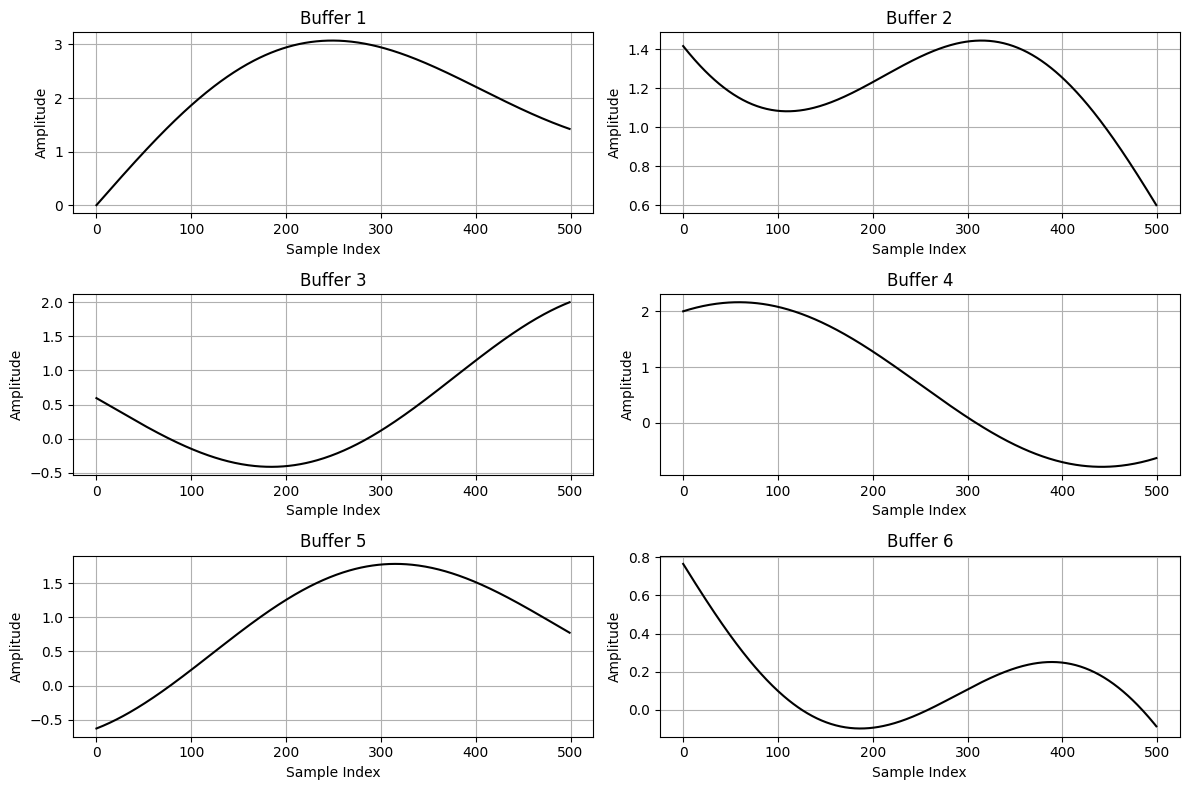

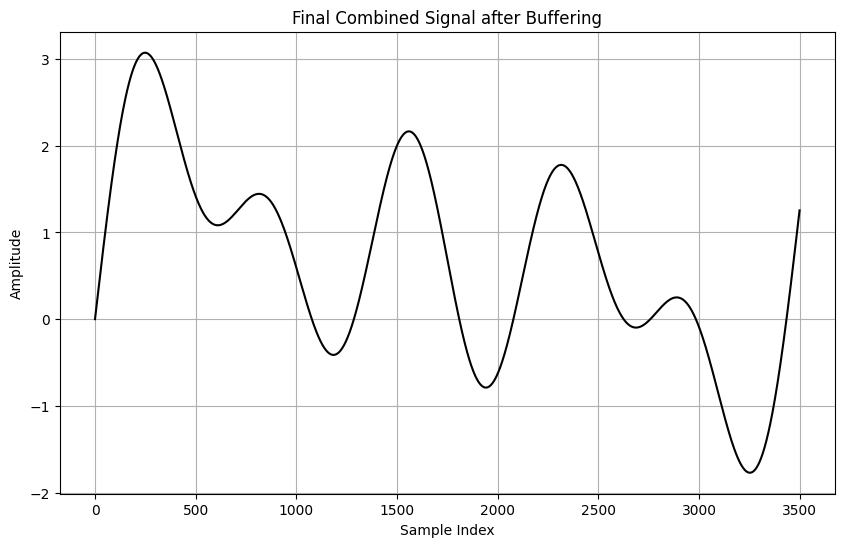

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_signal(frequencies, duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.zeros_like(t)

    for frequency in frequencies:
        signal += np.sin(2 * np.pi * frequency * t)

    return t, signal

def buffer_signal(signal, buffer_size):
    num_buffers = len(signal) // buffer_size
    buffers = np.split(signal[:num_buffers * buffer_size], num_buffers)
    return buffers

# Parameters
duration = 0.00001            # duration of the signal in seconds
sampling_rate = 350e6        # sampling rate in Hz (Nyquist sampling applies)
frequencies = [200, 500, 800, 1e3, 5e3, 15e3, 100e3, 200e3, 300e3, 500e3]
buffer_size = 500           # buffer size
num_buffers_to_plot = 6    # number of buffers to plot

# Generate complex signal
t, signal = generate_complex_signal(frequencies, duration, sampling_rate)

# Apply buffering process
buffers = buffer_signal(signal, buffer_size)

# Plot only the first six buffers
plt.figure(figsize=(12, 8))
for i in range(min(num_buffers_to_plot, len(buffers))):
    plt.subplot(3, 2, i+1)
    plt.plot(buffers[i], color='black')
    plt.title(f'Buffer {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the final combined signal after buffering
combined_signal = np.concatenate(buffers)
plt.figure(figsize=(10, 6))
plt.plot(combined_signal, color='black')
plt.title('Final Combined Signal after Buffering')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


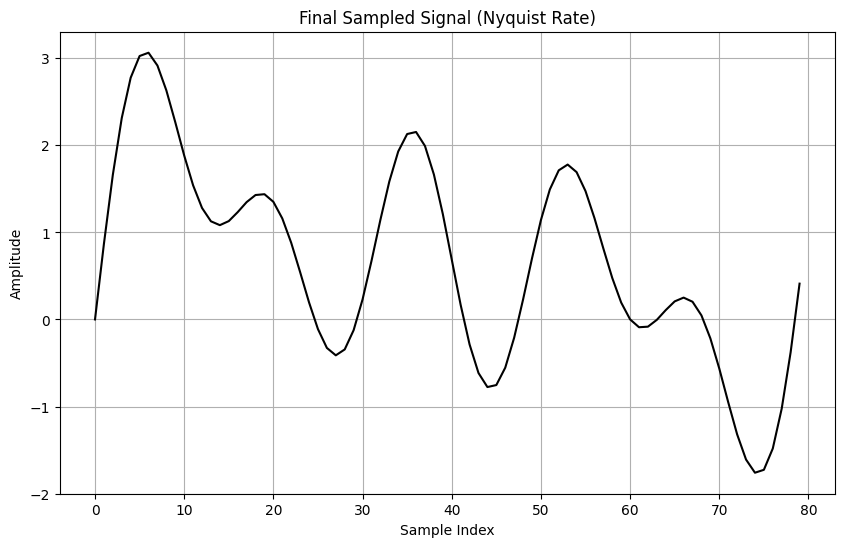

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_signal(frequencies, duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.zeros_like(t)

    for frequency in frequencies:
        signal += np.sin(2 * np.pi * frequency * t)

    return t, signal

def buffer_signal(signal, buffer_size):
    num_buffers = len(signal) // buffer_size
    remainder = len(signal) % buffer_size  # Get the remainder
    if remainder != 0:
        # Pad the signal with zeros to ensure the last buffer is complete
        signal = np.pad(signal, (0, buffer_size - remainder), mode='constant')
        num_buffers += 1
    buffers = np.split(signal, num_buffers)
    return buffers

# Parameters
duration = 0.00001            # duration of the signal in seconds
sampling_rate = 2000e6        # sampling rate is more than Nyquist sampling rate)
frequencies = [200, 500, 800, 1e3, 5e3, 15e3, 100e3, 200e3, 300e3, 500e3]
buffer_size = 500           # buffer size
num_buffers_to_plot = 6    # number of buffers to plot

# Generate complex signal
t, signal = generate_complex_signal(frequencies, duration, sampling_rate)

# Apply buffering process
buffers = buffer_signal(signal, buffer_size)

# Sample each buffer at Nyquist rate and plot
sampled_buffers = []
for buffer in buffers:
    # Sample each buffer at Nyquist rate
    num_samples = len(buffer) // 2  # Nyquist rate sampling
    sampled_buffer = buffer[::num_samples]
    sampled_buffers.append(sampled_buffer)

# Combine sampled buffers to get the final sampled signal
sampled_signal = np.concatenate(sampled_buffers)

# Plot the final sampled signal
plt.figure(figsize=(10, 6))
plt.plot(sampled_signal, color='black')
plt.title('Final Sampled Signal (Nyquist Rate)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


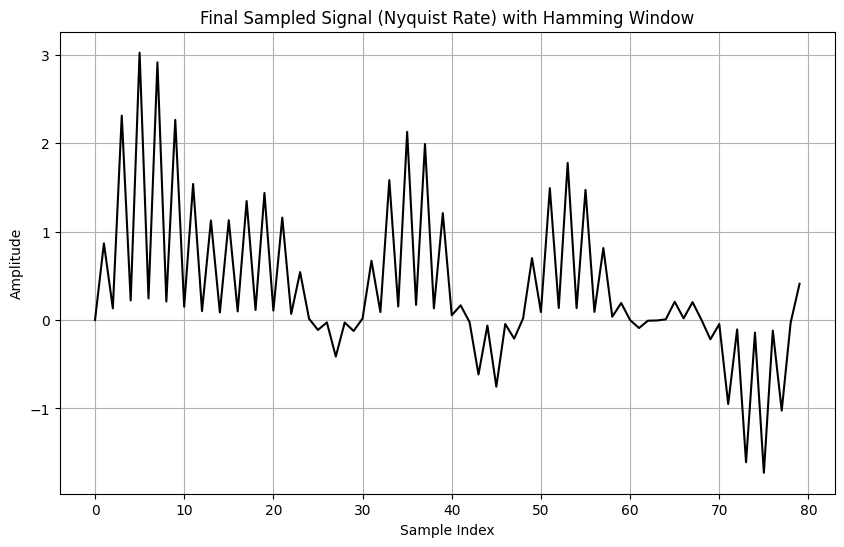

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_signal(frequencies, duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.zeros_like(t)

    for frequency in frequencies:
        signal += np.sin(2 * np.pi * frequency * t)

    return t, signal

def buffer_signal(signal, buffer_size):
    num_buffers = len(signal) // buffer_size
    remainder = len(signal) % buffer_size  # Get the remainder
    if remainder != 0:
        # Pad the signal with zeros to ensure the last buffer is complete
        signal = np.pad(signal, (0, buffer_size - remainder), mode='constant')
        num_buffers += 1
    buffers = np.split(signal, num_buffers)
    return buffers

# Apply Hamming window to each buffer
def apply_hamming_window(buffer):
    return buffer * np.hamming(len(buffer))

# Parameters
duration = 0.00001            # duration of the signal in seconds
sampling_rate = 2000e6        # sampling rate is more than Nyquist sampling rate)
frequencies = [200, 500, 800, 1e3, 5e3, 15e3, 100e3, 200e3, 300e3, 500e3]
buffer_size = 500           # buffer size
num_buffers_to_plot = 6    # number of buffers to plot

# Generate complex signal
t, signal = generate_complex_signal(frequencies, duration, sampling_rate)

# Apply buffering process
buffers = buffer_signal(signal, buffer_size)

# Apply Hamming window to each buffer
windowed_buffers = [apply_hamming_window(buffer) for buffer in buffers]

# Sample each buffer at Nyquist rate and plot
sampled_buffers = []
for buffer in windowed_buffers:
    # Sample each buffer at Nyquist rate
    num_samples = len(buffer) // 2  # Nyquist rate sampling
    sampled_buffer = buffer[::num_samples]
    sampled_buffers.append(sampled_buffer)

# Combine sampled buffers to get the final sampled signal
sampled_signal = np.concatenate(sampled_buffers)

# Plot the final sampled signal
plt.figure(figsize=(10, 6))
plt.plot(sampled_signal, color='black')
plt.title('Final Sampled Signal (Nyquist Rate) with Hamming Window')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


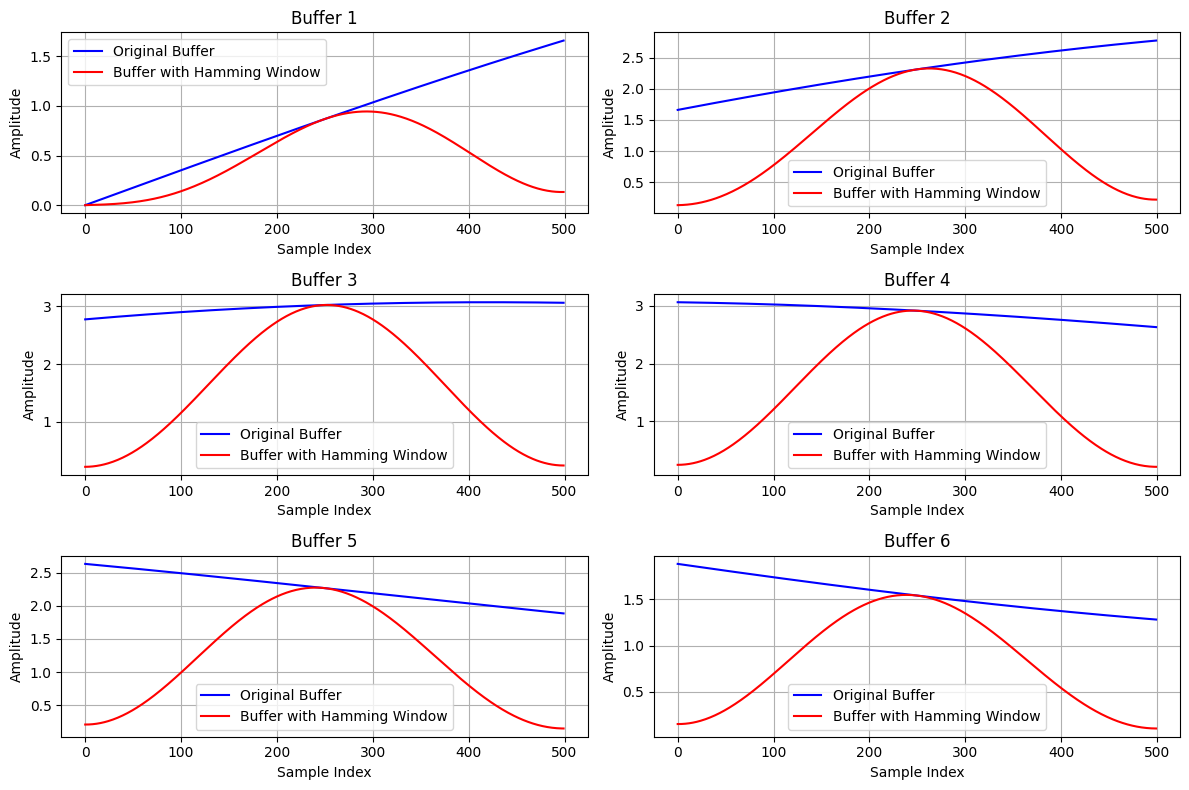

In [ ]:
#before samping windoing output
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_signal(frequencies, duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.zeros_like(t)

    for frequency in frequencies:
        signal += np.sin(2 * np.pi * frequency * t)

    return t, signal

def buffer_signal(signal, buffer_size):
    num_buffers = len(signal) // buffer_size
    remainder = len(signal) % buffer_size  # Get the remainder
    if remainder != 0:
        # Pad the signal with zeros to ensure the last buffer is complete
        signal = np.pad(signal, (0, buffer_size - remainder), mode='constant')
        num_buffers += 1
    buffers = np.split(signal, num_buffers)
    return buffers

# Apply Hamming window to each buffer
def apply_hamming_window(buffer):
    return buffer * np.hamming(len(buffer))

# Parameters
duration = 0.00001            # duration of the signal in seconds
sampling_rate = 2000e6        # sampling rate is more than Nyquist sampling rate)
frequencies = [200, 500, 800, 1e3, 5e3, 15e3, 100e3, 200e3, 300e3, 500e3]
buffer_size = 500           # buffer size
num_buffers_to_plot = 6    # number of buffers to plot

# Generate complex signal
t, signal = generate_complex_signal(frequencies, duration, sampling_rate)

# Apply buffering process
buffers = buffer_signal(signal, buffer_size)

# Apply Hamming window to each buffer
windowed_buffers = [apply_hamming_window(buffer) for buffer in buffers]

# Plot each buffer along with the applied Hamming window
plt.figure(figsize=(12, 8))
for i in range(min(num_buffers_to_plot, len(windowed_buffers))):
    plt.subplot(3, 2, i+1)
    plt.plot(buffers[i], color='blue', label='Original Buffer')
    plt.plot(windowed_buffers[i], color='red', label='Buffer with Hamming Window')
    plt.title(f'Buffer {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


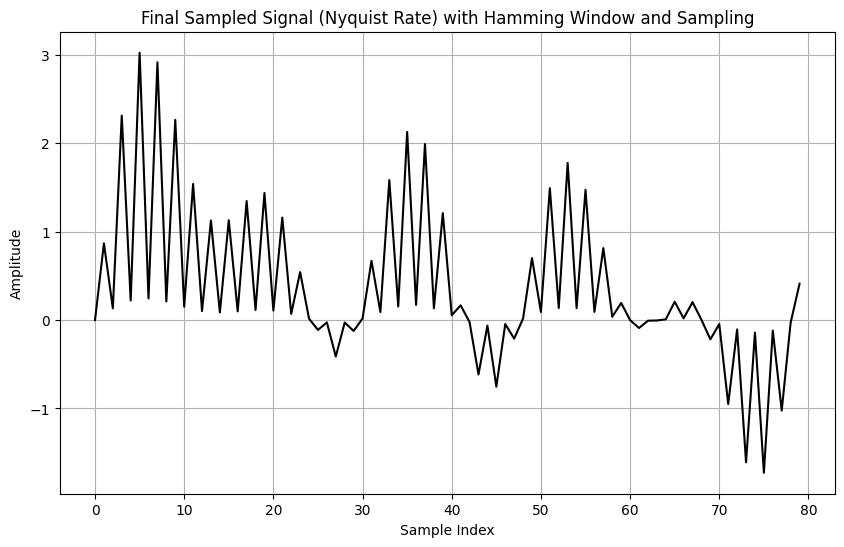

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_signal(frequencies, duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    signal = np.zeros_like(t)

    for frequency in frequencies:
        signal += np.sin(2 * np.pi * frequency * t)

    return t, signal

def buffer_signal(signal, buffer_size):
    num_buffers = len(signal) // buffer_size
    remainder = len(signal) % buffer_size  # Get the remainder
    if remainder != 0:
        # Pad the signal with zeros to ensure the last buffer is complete
        signal = np.pad(signal, (0, buffer_size - remainder), mode='constant')
        num_buffers += 1
    buffers = np.split(signal, num_buffers)
    return buffers

# Apply Hamming window to each buffer
def apply_hamming_window(buffer):
    return buffer * np.hamming(len(buffer))

# Parameters
duration = 0.00001            # duration of the signal in seconds
sampling_rate = 2000e6        # sampling rate is more than Nyquist sampling rate)
frequencies = [200, 500, 800, 1e3, 5e3, 15e3, 100e3, 200e3, 300e3, 500e3]
buffer_size = 500           # buffer size
num_buffers_to_plot = 6    # number of buffers to plot

# Generate complex signal
t, signal = generate_complex_signal(frequencies, duration, sampling_rate)

# Apply buffering process
buffers = buffer_signal(signal, buffer_size)

# Apply Hamming window to each buffer
windowed_buffers = [apply_hamming_window(buffer) for buffer in buffers]

# Sample each buffer at Nyquist rate
sampled_buffers = []
for buffer in windowed_buffers:
    num_samples = len(buffer) // 2  # Nyquist rate sampling
    sampled_buffer = buffer[::num_samples]
    sampled_buffers.append(sampled_buffer)

# Combine sampled buffers to get the final sampled signal
sampled_signal = np.concatenate(sampled_buffers)

# Plot the final sampled signal
plt.figure(figsize=(10, 6))
plt.plot(sampled_signal, color='black')
plt.title('Final Sampled Signal (Nyquist Rate) with Hamming Window and Sampling')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


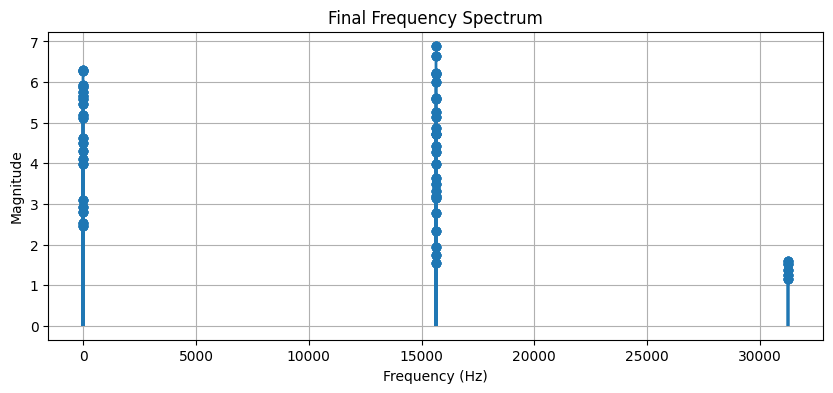

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a signal with multiple frequency components
Fs = 1000  # Sampling frequency
T = 1  # Duration of signal in seconds
t = np.arange(0, T, 1/Fs)  # Time vector

# Generate the signal (combination of two sine waves)
frequencies = [50, 120]  # Frequencies of the sine waves in Hz
signal = np.sum([np.sin(2 * np.pi * f * t) for f in frequencies], axis=0)

# Step 2: Divide the signal into chunks (each containing 8 points)
chunk_size = 8
num_chunks = len(signal) // chunk_size
chunks = np.split(signal[:num_chunks * chunk_size], num_chunks)

# Step 3: Compute the FFT manually for each chunk and extract dominant frequency components
final_freqs = []
final_magnitudes = []

for chunk in chunks:
    n = len(chunk)
    k = np.arange(n)
    T = n / Fs
    frq = k / T   # Two-sided frequency range
    frq = frq[:n//2]  # One-sided frequency range

    # Compute FFT manually
    Y = np.zeros(n//2, dtype=complex)
    for m in range(len(Y)):
        Y[m] = np.sum(chunk * np.exp(-1j * 2 * np.pi * k * m / n))

    # Convert each point in the chunk to its corresponding frequency
    freqs = frq * Fs / n

    # Find the two highest peaks in the magnitude spectrum
    sorted_indices = np.argsort(abs(Y))[::-1]
    dominant_freqs = freqs[sorted_indices[:2]]
    dominant_mags = abs(Y)[sorted_indices[:2]]

    # Add the dominant frequency components to the final output
    final_freqs.extend(dominant_freqs)
    final_magnitudes.extend(dominant_mags)

# Step 4: Plot the final frequency spectrum
plt.figure(figsize=(10, 4))
plt.stem(final_freqs, final_magnitudes, basefmt=' ')
plt.title('Final Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

